In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

y = digits.target

Y = pd.get_dummies(y).values

print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False  True]
 [False False False ... False  True False]]


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import numpy as np

model = Sequential()

model.add(Dense(192,input_shape=(64,),activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 192)               12480     
                                                                 
 dense_5 (Dense)             (None, 48)                9264      
                                                                 
 dense_6 (Dense)             (None, 24)                1176      
                                                                 
 dense_7 (Dense)             (None, 10)                250       
                                                                 
Total params: 23170 (90.51 KB)
Trainable params: 23170 (90.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=64,validation_split= 0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
21/21 [==============================] - 1s 7ms/step - loss: 2.1513 - accuracy: 0.3751 - val_loss: 1.2631 - val_accuracy: 0.6181
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.7363 - val_loss: 0.5669 - val_accuracy: 0.8542
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8824 - val_loss: 0.2857 - val_accuracy: 0.9167
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9474 - val_loss: 0.1542 - val_accuracy: 0.9583
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9737 - val_loss: 0.1130 - val_accuracy: 0.9653
Epoch 6/30
21/21 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9838 - val_loss: 0.1093 - val_accuracy: 0.9722
Epoch 7/30
21/21 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9907 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 8/30
21/21 [==

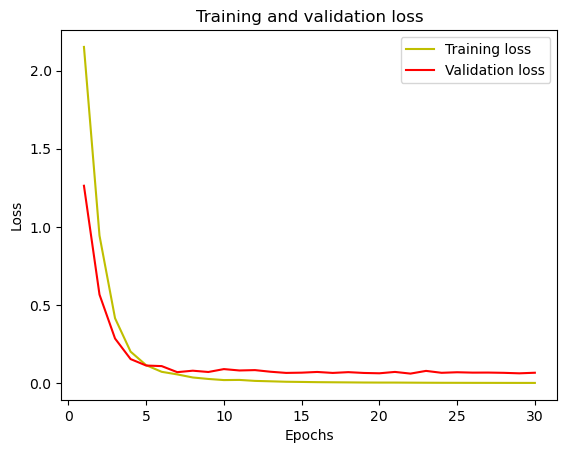

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.95      0.96        41
           2       0.95      0.95      0.95        38
           3       0.92      0.97      0.95        36
           4       1.00      0.97      0.99        36
           5       0.95      0.95      0.95        40
           6       1.00      1.00      1.00        27
           7       0.92      0.94      0.93        36
           8       0.94      0.94      0.94        35
           9       0.94      0.91      0.93        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  1  0  0  0  0  0  1  0]
 [ 0  0 36  2  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  1  0

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
0.9777777777777777
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  1  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  3  0  1  0  0  0  0 28  0]
 [ 0  0  0  0  1  0  0  0  0 37]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8722222222222222
[[33  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  1  0  0  0  0  3  0]
 [ 0  1 35  0  0  0  0  1  2  0]
 [ 0  0  1 28  0  0  0  1  1  0]
 [ 1  0  0  0 35  1  1  0  0  3]
 [ 2  1  0  0  0 28  2  0  0  2]
 [ 0  0  0  0  2  0 41  0  0  0]
 [ 0  3  0  3  0  0  0 33  1  0]
 [ 0  0  0  2  0  0  0  1 19  1]
 [ 0  2  1  1  0  1  0  0  3 27]]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9611111111111111
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  1 38  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  1  0]
 [ 0  1  0  0 39  0  0  0  0  1]
 [ 0  0  0  0  0 31  0  1  0  3]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  1  1  0  0 21  0]
 [ 0  0  0  1  0  0  0  0  1 33]]


C:\Users\alsgu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))



--- Radom Forest ---
0.9805555555555555
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  1  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  1 33  0  0  0  1]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  1 22  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
